In [ ]:
from keras.datasets.mnist import load_data

(train_images, train_labels), (test_images, test_labels) = load_data()
digits = train_images
labels = train_labels

In [ ]:
print(digits.shape)
print(labels.shape)

(60000, 28, 28)
(60000,)


**PRINTING THE IMAGES**

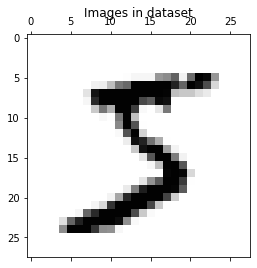

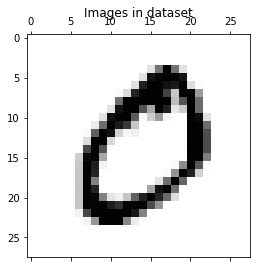

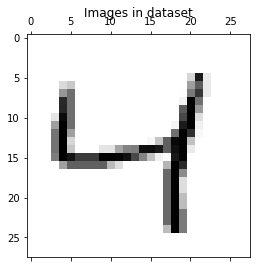

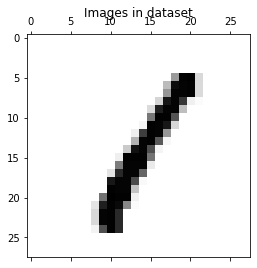

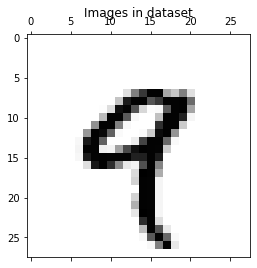

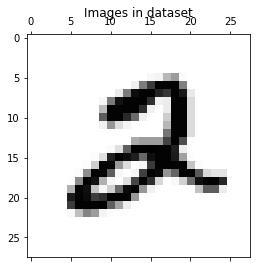

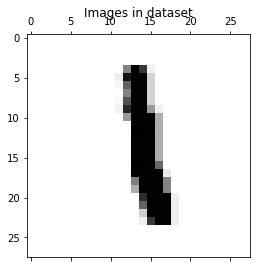

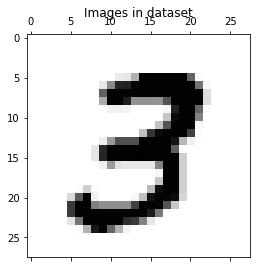

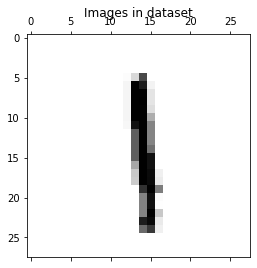

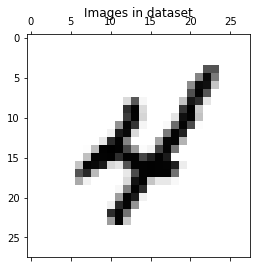

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# first 5 images of training data
for i in range(10):
    train_img = np.reshape(digits[i],(28,28))
    plt.matshow(train_img,cmap="Greys")
    plt.title("Images in dataset")
    plt.show()

In [ ]:
digits = digits.reshape(digits.shape[0],digits.shape[1]*digits.shape[2])
print(digits.shape)

(60000, 784)


**LETS CALCULATE THE COVARIANCE MATRIX**

PCA is to find the orthogonal directions of maximum varainance of the standarised data only if the data is projected in those directions and variance of the data is maximum.

If we project the data along the maximim variance , the there will be less loss of infomation when we perform dimensionality reduction. 

Before moving on to calculating covariance of the dataset, we must perform standardisation of data. Since, we are calculating the projection of data along the maximum variance. we dont want one an element with highest variance to mislead and provide highest weightage eventhough it is not an important information in dimensionality reduction.

In [ ]:
#For each column we are calculating the mean to center the columns
Mean = np.mean(digits.T, axis=1)
print(Mean)
#Here, we are subtracting the column means to center each column
digits_standardise = digits - Mean

#calulating the covarience matrix
covariance_matrix = np.cov(digits_standardise.T)
print("Covariance matrix Dimensionality is: ",covariance_matrix.shape)
print("Covariance matrix is\n",covariance_matrix)


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.10000000e-03 7.83333333e-03 3.60000000e-03 1.50000000e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.66666667e-04 9.16666667e-04 9.28333333e-03 2.42833333e-02
 4.37166667e-02 6.41000000e-02 1.20133333e-01 1.60733333e-01
 1.74183333e-01 1.77433333e-01 1.89316667e-01 1.74150000e-01
 1.86933333e-01 1.53650000e-01 1.00116667e-01 7.12333333e-02
 5.38166667e-02 2.13666667e-02 1.00833333e-02 3.53333333e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.06666667e-03 7.00000000e-04
 6.95000000e-03 5.48333333e-03 4.71000000e-02 1.38400000e-01
 2.64183333e-01 5.066166

Eigen vectors of covaraince matrix gives the direction of maximum variance in a dataset. Eigen vectors also principle components once calculated, our dataset can be projectd along the matrix. 

In [ ]:
#Eigen Decomposition
from numpy.linalg import eig

eig_val,eig_vect = eig(covariance_matrix)
eig_val = np.abs(eig_val)

#Here we are sorting the principle components in desceding order with respect to varaince. 
cvar =  np.var(np.dot(digits_standardise,eig_vect),axis=0)
idx = np.argsort(-cvar)
cvar = cvar[idx]
eig_vect = eig_vect[:,idx]

print("The eigen vectors are \n",eig_vect)
print("The variance captured along each PrincipleComponent:",cvar)
print("Ratio of variance captured along each PrincipleComponent: ",np.cumsum(cvar)/np.sum(cvar))


The eigen vectors are 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
The variance captured along each PrincipleComponent: [3.32719122e+05 2.43279884e+05 2.11503842e+05 1.84773306e+05
 1.66924049e+05 1.47842498e+05 1.12176333e+05 9.88727817e+04
 9.46946708e+04 8.08084777e+04 7.23124150e+04 6.93571454e+04
 5.88258907e+04 5.80131171e+04 5.41228549e+04 5.08422211e+04
 4.54118494e+04 4.37777295e+04 4.07046620e+04 3.95191317e+04
 3.65529266e+04 3.45146186e+04 3.26927412e+04 3.12860644e+04
 3.02870478e+04 2.87755987e+04 2.78588211e+04 2.69601321e+04
 2.55327680e+04 2.36857282e+04 2.25623859e+04 2.22213960e+04
 2.06603275e+04 2.01106502e+04 1.95428752e+04 1.86379815e+04
 1.73406113e+04 1.67259660e+04 1.65055423e+04 1.61913933e+04
 1.56593189e+04 1.52509599e+04 1.43480897e+04 1.36525956e+04
 1.31986443e+04 1.28602149e+04 1.24112759e+04 1.20541151e+04
 1.16587100e+04 1.10352905e+04 1.09

**SCREEN PLOT**

This provides the ratio of explained variance captured along the every dimension

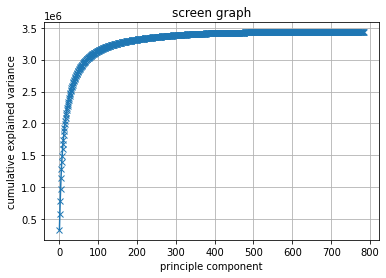

In [ ]:
plt.plot(np.arange(len(cvar))+1,np.cumsum(cvar),'x-')
plt.ylabel('cumulative explained variance')
plt.xlabel('principle component')
plt.title('screen graph')
plt.grid()
plt.show()

**REDUCING THE DIMENSIONALITY**

In [ ]:
#selecting upto 2 principal components only


Y = np.dot(digits_standardise,eig_vect[:,0:2]) #This is nothing but  z = W.T * X 
#we can write it as a .dot product - which is similar to W.T * X

print("After  Data Transformation\n",Y)
print("variance ratio captured along the projections: ",np.var(Y,axis=0)/np.sum(np.var(digits_standardise,axis=0)))

After  Data Transformation
 [[ -123.93258866  -312.67426202]
 [-1011.71837587  -294.85703827]
 [   51.84960805   392.17315286]
 ...
 [  178.0534496    160.07821109]
 [ -130.60607208    -5.59193642]
 [  173.43595244   -24.71880226]]
variance ratio captured along the projections:  [0.09704664 0.07095924]


The variance that has largest value is the first principle componenet and the other one is second principle component. 

[0.09704664 0.07095924]

**VISUALISING THE PRINCIPLE COMPOMENTS**

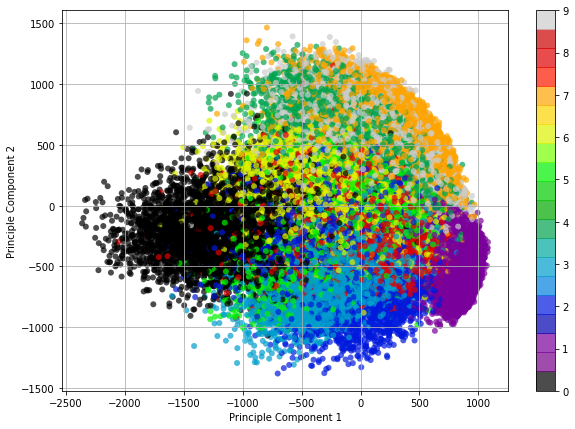

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(Y[:, 0], Y[:, 1],
            c= labels, edgecolor='none', alpha=0.7,
            cmap=plt.cm.get_cmap('nipy_spectral', 20));
plt.grid()
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.colorbar();
plt.show()